In [1]:
import os
import sys
import tarfile
import time
import pandas as pd

In [2]:
df = pd.read_csv('davivienda_tweets.csv', encoding='utf-8')
df.head(3)

,id,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...


## Cleaning text data

In [3]:
df.loc[0, 'Embedded_text'][-50:]

', asociado al aumento en la tasa de cambio.\n1\n7\n19'

In [11]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)@',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [12]:
preprocessor(df.loc[0, 'Embedded_text'][-50:])

'es asociado al aumento en la tasa de cambio 1 7 19'

In [13]:
df['Embedded_text'] = df['Embedded_text'].apply(preprocessor)
data_clean = pd.DataFrame(df.Embedded_text.apply(preprocessor))
data_clean

,Embedded_text
0,la confianza se afectó el indicador de confian...
1,buscamos la accesibilidad y mejor atención en ...
2,señores davivienda no he podido ingresar a mi ...
3,llevo toda una semana sufriendo intento de hur...
4,hemos retrocedido tanto en este país con este ...
...,...
1806,en respuesta a jaimemolina buenas tardes sr ja...
1807,en respuesta a josefe71 hola jose gracias por ...
1808,en respuesta a gleniiaaa hola bienvenida a nue...
1809,en respuesta a diegoruix buenos días sr diego ...


In [14]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('spanish')

cv = CountVectorizer(stop_words=stop)
data_cv = cv.fit_transform(data_clean.Embedded_text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index

data_dtm.to_pickle('dtm.pkl')
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open('cv.pkl', 'wb'))


In [15]:
data_dtm

,00,000,0005,000821,007700667947,008480304420,00am,01,018000123838,036470248620,...,ético,éxito,índice,última,últimamente,último,últimos,única,únicamente,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4 – Análisis Exploratorio

In [16]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data = data.sort_index()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007700667947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Palabras más usadas

In [17]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
print(top_dict)
# Print the top 15 words by year
for top_words in top_dict.items():
    print(', '.join([word for word, count in top_words[0:14]]))

{0: [('indicador', 2), ('confianza', 2), ('meses', 1), ('tendencia', 1), ('mes', 1), ('19', 1), ('especialmente', 1), ('semana', 1), ('asociado', 1), ('davivienda', 1), ('leve', 1), ('aumento', 1), ('tasa', 1), ('noviembre', 1), ('caída', 1), ('deterioró', 1), ('cambio', 1), ('mejoras', 1), ('cinco', 1), ('rompiendo', 1), ('última', 1), ('afectó', 1), ('noriclago', 0), ('notan', 0), ('noticia', 0), ('noridaoficial', 0), ('nonpueden', 0), ('noo', 0), ('notengandudaque', 0), ('nooo', 0)], 1: [('banco', 3), ('bancarios', 1), ('preferencia', 1), ('cuscatlán', 1), ('bancos', 1), ('fedecrédito', 1), ('ello', 1), ('buscamos', 1), ('davivienda', 1), ('encuentras', 1), ('promerica', 1), ('accesibilidad', 1), ('trámites', 1), ('siguientes', 1), ('plaza', 1), ('bancoagrícola', 1), ('atención', 1), ('mejor', 1), ('00', 0), ('nota', 0), ('notan', 0), ('notas', 0), ('noslenshoesk', 0), ('normalmente', 0), ('norte', 0), ('noticia', 0), ('normalidad', 0), ('normal', 0), ('noridaoficial', 0), ('norida'

TypeError: cannot unpack non-iterable int object

In [25]:
top_dict

{0: [('indicador', 2),
  ('confianza', 2),
  ('meses', 1),
  ('tendencia', 1),
  ('mes', 1),
  ('19', 1),
  ('especialmente', 1),
  ('semana', 1),
  ('asociado', 1),
  ('davivienda', 1),
  ('leve', 1),
  ('aumento', 1),
  ('tasa', 1),
  ('noviembre', 1),
  ('caída', 1),
  ('deterioró', 1),
  ('cambio', 1),
  ('mejoras', 1),
  ('cinco', 1),
  ('rompiendo', 1),
  ('última', 1),
  ('afectó', 1),
  ('noriclago', 0),
  ('notan', 0),
  ('noticia', 0),
  ('noridaoficial', 0),
  ('nonpueden', 0),
  ('noo', 0),
  ('notengandudaque', 0),
  ('nooo', 0)],
 1: [('banco', 3),
  ('bancarios', 1),
  ('preferencia', 1),
  ('cuscatlán', 1),
  ('bancos', 1),
  ('fedecrédito', 1),
  ('ello', 1),
  ('buscamos', 1),
  ('davivienda', 1),
  ('encuentras', 1),
  ('promerica', 1),
  ('accesibilidad', 1),
  ('trámites', 1),
  ('siguientes', 1),
  ('plaza', 1),
  ('bancoagrícola', 1),
  ('atención', 1),
  ('mejor', 1),
  ('00', 0),
  ('nota', 0),
  ('notan', 0),
  ('notas', 0),
  ('noslenshoesk', 0),
  ('normalme

## 4.2 Agregamos Stop Words

In [52]:
from collections import Counter

# Let's first pull out the top 30 words for each anio
words = []
for c in data.columns:
    top = [word for (word, count) in top_dict[c]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('nota', 1474), ('notan', 1464), ('davivienda', 1463), ('noslenshoesk', 1428), ('notas', 1415), ('norte', 1356), ('notengandudaque', 1310), ('normalmente', 1278), ('normalidad', 1227), ('noticia', 1190), ('normal', 1159), ('noridaoficial', 1133), ('norida', 1101), ('noriclago', 1069), ('nop', 1033), ('respuesta', 1031), ('noticia_lopez65', 1030), ('nooo', 978), ('noo', 901), ('noticias', 833), ('nonpueden', 803), ('nomina', 661), ('noticiascaracol', 605), ('00', 586), ('nomejor', 511), ('noticiascaracoltv', 421), ('nombres', 316), ('mensaje', 282), ('privado', 233), ('noticiasdecolombia', 228), ('favor', 226), ('atentos', 220), ('caso', 219), ('quedamos', 197), ('buenas', 164), ('nombre', 160), ('si', 160), ('banco', 159), ('daviplata', 154), ('cuenta', 134), ('respondiendo', 134), ('días', 128), ('noticiasrcn', 123), ('tardes', 121), ('dinero', 117), ('app', 103), ('wilsonariasc', 99), ('día', 98), ('bancolombia', 95), ('gusto', 95), ('nubank', 91), ('hacer', 90), ('ntcoral', 88), ('

['nota',
 'notan',
 'davivienda',
 'noslenshoesk',
 'notas',
 'norte',
 'notengandudaque',
 'normalmente',
 'normalidad',
 'noticia',
 'normal',
 'noridaoficial',
 'norida',
 'noriclago',
 'nop',
 'respuesta',
 'noticia_lopez65',
 'nooo',
 'noo',
 'noticias',
 'nonpueden',
 'nomina',
 'noticiascaracol',
 '00',
 'nomejor',
 'noticiascaracoltv',
 'nombres',
 'mensaje',
 'privado',
 'noticiasdecolombia',
 'favor',
 'atentos',
 'caso',
 'quedamos',
 'buenas',
 'nombre',
 'si',
 'banco',
 'daviplata',
 'cuenta',
 'respondiendo',
 'días',
 'noticiasrcn',
 'tardes',
 'dinero',
 'app',
 'wilsonariasc',
 'día',
 'bancolombia',
 'gusto',
 'nubank',
 'hacer',
 'ntcoral',
 'sfcsupervisor',
 'servicio',
 'buenos',
 'lamentamos',
 'inconvenientes',
 'nro',
 'nube',
 'validaremos',
 'atención',
 'hace',
 'solo',
 'ustedes',
 'solución',
 'sr',
 'conocer',
 'lugar',
 'nubia_ti',
 'saludos',
 'problema',
 'equivocado',
 'gracias',
 'noxpirín',
 'datos',
 'hola',
 'marianiniecheve',
 'así',
 'detalles',

## 4.3 Nube de Palabras

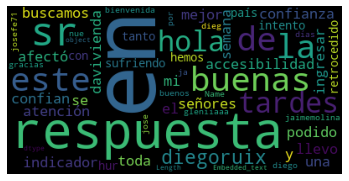

In [54]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=Counter(words).most_common(), background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
import matplotlib.pyplot as plt
text = data_clean.Embedded_text 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [49]:
count = CountVectorizer(stop_words=stop,
                        max_df=.8,
                        max_features=1000)
X = count.fit_transform(data_clean.Embedded_text)
data_stop = pd.DataFrame(X.toarray(), columns=count.get_feature_names_out())
data_stop.index = data_clean.index

data_clean.to_pickle('data_clean.pkl')
pickle.dump(count, open("count.pkl", "wb"))

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10,
                                random_state=123,
                                learning_method='batch')
X_topics = lda.fit_transform(X)


In [45]:
# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

In [46]:
lda.components_.shape

(10, 1000)

In [47]:
n_top_words = 5
feature_names = count.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))

Topic 1:
daviplata solución respuesta nadie dinero
Topic 2:
respuesta daviplata sfcsupervisor banco servicio
Topic 3:
privado mensaje respuesta atentos quedamos
Topic 4:
respuesta disculpas favor solicitud buenas
Topic 5:
respuesta mensaje interno hola caso
Topic 6:
respuesta wilsonariasc respondiendo marianiniecheve segurosbolivar
Topic 7:
respuesta si bancolombia app banco
Topic 8:
respuesta lugar equivocado navidad ustedes
Topic 9:
cuenta respuesta app hacer hace
Topic 10:
cuenta respuesta hoy https año
